<a href="https://colab.research.google.com/github/manastelavane/Optimization-for-Vehicle-Routing-Problem-using-Genetic-Algorithms/blob/main/Optimization_for_Vehicle_Routing_Problem_using_Genetic_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Optimization for Vehicle Routing Problem using Genetic Algorithms**

### **Installing required Libraries**

In [98]:
!pip install matplotlib deap

### **Importing Libraries**

In [99]:
# Required Libraries
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms
from matplotlib.animation import FuncAnimation

### **Define the number of locations and vehicles**

In [100]:
num_locations = 30  # Define how many locations (excluding the depot) the vehicles need to visit
locations = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(num_locations)]  # Generate random (x, y) coordinates for each location
depot = (50, 50)  # Define the central depot location as a fixed point
num_vehicles = 3  # Define how many vehicles are available to visit the locations

### **Genetic Algorithm Setup**

In [101]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))  # Define fitness function to minimize. The two objectives are total distance and balance penalty.
creator.create("Individual", list, fitness=creator.FitnessMin)  # Define individual structure. Individuals are lists with a fitness attribute.

In [102]:
toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)  # Function to generate a list of unique, randomly ordered location indices
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)  # Function to create an individual as a shuffled list of location indices
toolbox.register("population", tools.initRepeat, list, toolbox.individual)  # Function to create a population of individuals


### **Fitness Function**

In [103]:
# Fitness Function
def evalVRP(individual):
    total_distance = 0
    distances = []  # Track distance traveled by each vehicle for balance calculation
    # Split the list of locations among vehicles, ensuring each starts and ends at the depot
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        # Calculate total distance traveled by this vehicle
        vehicle_distance = sum(np.linalg.norm(np.array(vehicle_route[k+1]) - np.array(vehicle_route[k])) for k in range(len(vehicle_route)-1))
        total_distance += vehicle_distance
        distances.append(vehicle_distance)
    balance_penalty = np.std(distances)  # Use standard deviation of distances as a penalty for imbalance among vehicles
    return total_distance, balance_penalty

In [104]:
toolbox.register("evaluate", evalVRP)  # Register the evaluation function
toolbox.register("mate", tools.cxPartialyMatched)  # Register the crossover function suitable for permutation-based representation
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)  # Register the mutation function to shuffle indices with a 5% chance per index
toolbox.register("select", tools.selTournament, tournsize=3)  # Register the selection function using tournament selection


### **Plotting Function**

In [105]:
# Plotting Function
def plot_routes(individual, title="Routes"):
    plt.figure()
    # Plot locations as blue dots and the depot as a red square
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')

    # Draw routes for each vehicle
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-')

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

### **Running the Genetic Algorithm**

In [106]:
# Running the Genetic Algorithm
def main():
    random.seed(42)  # Seed for reproducibility
    pop = toolbox.population(n=300)  # Generate initial population
    hof = tools.HallOfFame(1)  # Hall of Fame to store the best individual

    # Setup statistics to track
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    # Run the genetic algorithm
    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 300, stats=stats, halloffame=hof)

    # Plot the best route found
    plot_routes(hof[0], "Optimal Route")


    return pop, stats, hof

### **Main function**

gen	nevals	avg    	min    
0  	300   	869.494	5.25715
1  	232   	838.033	7.39786
2  	227   	827.112	2.82158
3  	245   	825.334	3.85874
4  	222   	812.713	3.85874
5  	234   	813.059	4.50436
6  	212   	796.614	1.56777
7  	244   	796.992	4.10684
8  	230   	789.621	2.56468
9  	224   	780.206	4.50436
10 	209   	780.635	1.56094
11 	227   	778.373	6.19521
12 	221   	777.416	4.36537
13 	230   	771.953	5.68157
14 	226   	760.308	3.38171
15 	221   	748.07 	2.29605
16 	231   	734.831	2.25708
17 	218   	718.04 	1.87199
18 	242   	709.166	3.98617
19 	218   	678.154	4.45913
20 	249   	666.375	2.52379
21 	217   	649.229	2.69383
22 	209   	624.012	1.97499
23 	217   	608.598	3.8317 
24 	221   	597.886	2.001  
25 	225   	586.959	2.001  
26 	239   	580.654	2.001  
27 	237   	576.104	4.3981 
28 	234   	571.111	4.28495
29 	228   	560.458	2.27319
30 	225   	557.907	4.54252
31 	235   	551.304	1.20907
32 	232   	542.052	1.69218
33 	221   	531.628	1.69218
34 	227   	524.162	1.69218
35 	224   	517.747	1.0762 
3

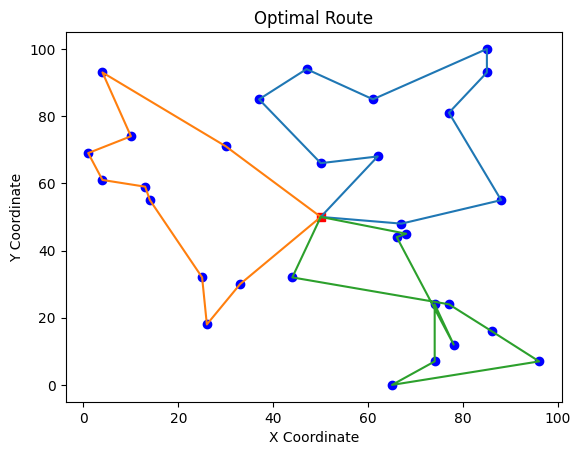

In [107]:
if __name__ == "__main__":
    main()